# Ciclo 2 - Análise
---
## Aula 15 - Respondendo as perguntas de negócios

**OBS:** Decidi fazer uma pequena limpeza antes de começar a realmente fazer as análises, atravéz dessa limpeza consegui contornar alguns erros que ocorrerão durante as próximas aulas. Caso queira ter exatamente os mesmos resultados que o professor teve, basta comentar ou apagar a seguinte linha: ```df = df.dropna(how='any') ```

1. **Quais são as categorias de imóveis que estão cadastradas dentro da base de dados da cidade de Nova York?**

In [2]:
import pandas as pd

df = pd.read_csv("AB_NYC_2019.csv") # Importando a base no formato csv
df = df.dropna(how='any') # Excluindo linhas nas quais existem pelo menos algum valor em branco
df.info() # Exibindo algumas informações gerais do Dataframe

<class 'pandas.core.frame.DataFrame'>
Index: 38821 entries, 0 to 48852
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38821 non-null  int64  
 1   name                            38821 non-null  object 
 2   host_id                         38821 non-null  int64  
 3   host_name                       38821 non-null  object 
 4   neighbourhood_group             38821 non-null  object 
 5   neighbourhood                   38821 non-null  object 
 6   latitude                        38821 non-null  float64
 7   longitude                       38821 non-null  float64
 8   room_type                       38821 non-null  object 
 9   price                           38821 non-null  int64  
 10  minimum_nights                  38821 non-null  int64  
 11  number_of_reviews               38821 non-null  int64  
 12  last_review                     38821

In [25]:
# Na aula 15 o Meigaron responde essa pergunta de negócio utilizando a biblioteca Numpy, decidi fazer de uma forma mais simples que chegasse ao mesmo resultado.
print(df["room_type"].unique())

['Private room' 'Entire home/apt' 'Shared room']


2. **Quantos usuários (Hosts) únicos cadastrados existem dentro da base de dados da cidade de Nova York?**

In [27]:
# Também fiz de uma forma diferente do que é explicado no curso, resultado obtido é o mesmo
print(len(df["host_id"].unique()))

30232


3. **Como é a variação do preços dos imóveis em NY?**

In [12]:
import numpy as np

preco_imoveis = df.loc[:, "price"]

print(np.std(preco_imoveis)) # Desvio padrão é a "distância" que a núvem de pontos está do ponto central(Média)
print(np.mean(preco_imoveis)) # Média

196.99221868302203
142.33252621004095


4. **Existem mais imóveis baratos ou caros?**

<Axes: >

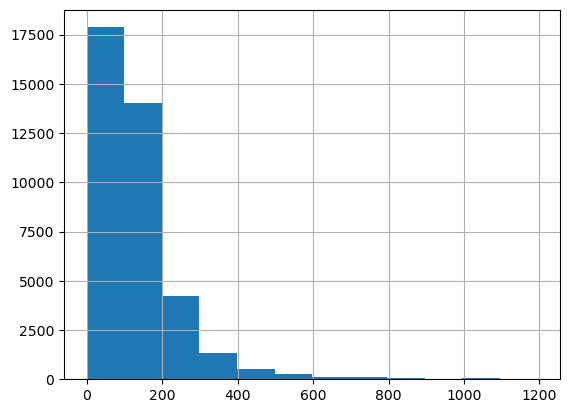

In [20]:
#Também consegui responder sem precisar importar nenhuma biblioteca
linhas = df.loc[:, "price"] < 1200
preco = df.loc[linhas, "price"]
preco.hist(bins=12)

5. **Qual a distribuição do número de Reviews? Existem imóveis com muitos e outro com poucos reviews?**

<Axes: >

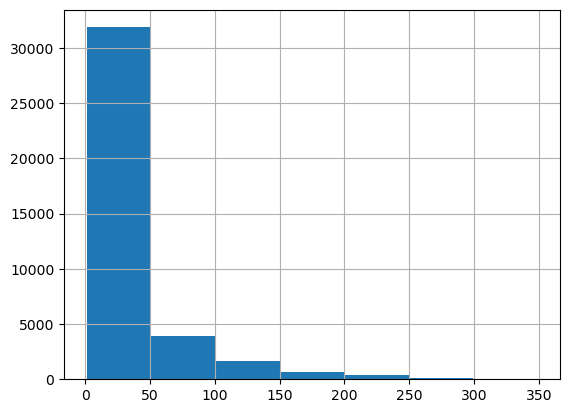

In [29]:
linhas = df.loc[:, "number_of_reviews"] < 350
numero_de_reviews = df.loc[linhas, "number_of_reviews"]
numero_de_reviews.hist(bins=7)

## Exercícios - Aula 16

1. **Qual é o intervalo de variação do preço dos alugueis dos imóveis?** 

In [29]:
desvio_padrao = df.loc[:, "price"].std()
media = df["price"].mean()
print(f"O valor médio do preço dos aluguéis é U${media:.2f} +/- U${desvio_padrao:.2f} de desvio") # Mesmo formato do vídeo porém com f-string

O valor médio do preço dos aluguéis é U$142.33 +/- U$196.99 de desvio


2. **Qual a distribuição dos imóveis de acordo com o número de pernoites que podem ser agendados?**

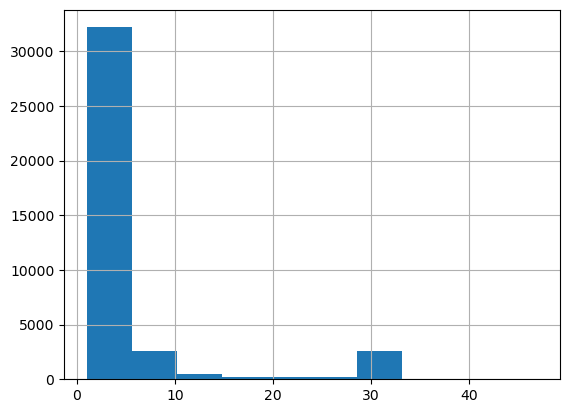

In [31]:
linhas = df.loc[:, "minimum_nights"] < 50
minimum_nights = df.loc[linhas, "minimum_nights"]
minimum_nights.hist(bins=10);

3. **Qual a média e a mediana de imóveis cadastrados por host(dono do imóvel)?**

In [30]:
media_host = df["calculated_host_listings_count"].mean()
print(media_host)
mediana_host = df["calculated_host_listings_count"].median()
print(mediana_host)

5.16661085494964
1.0


4. **Como você interpretaria o seguinte histograma?**
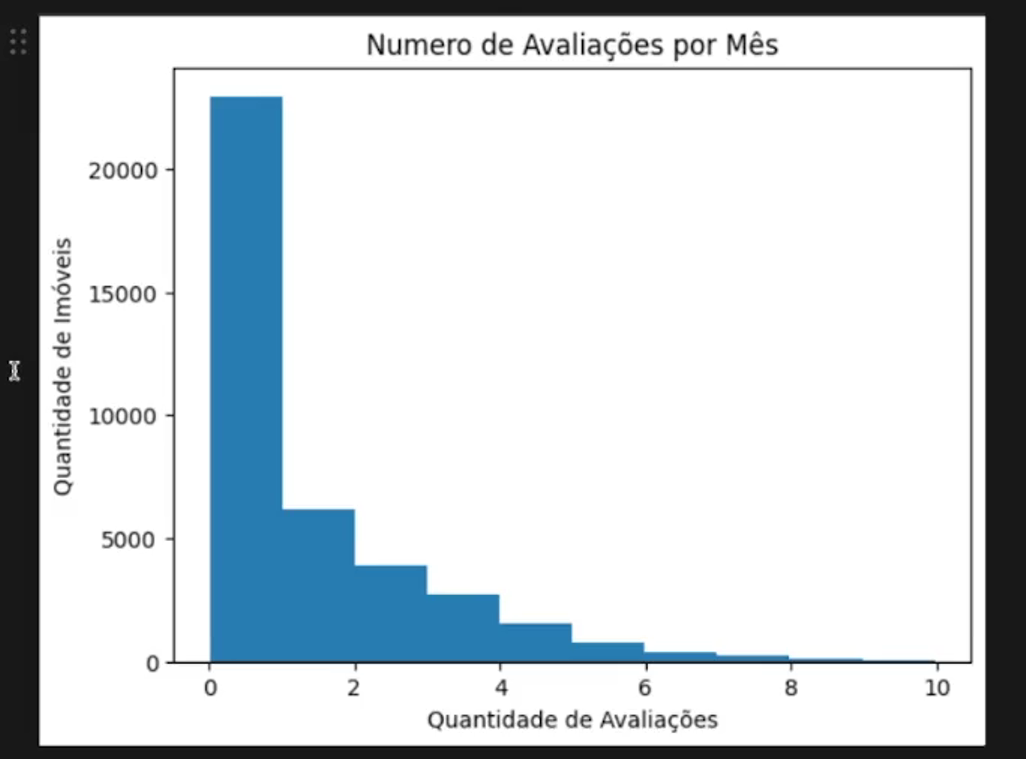

In [32]:
#R: A maior parte das avaliações dos imóveis está entre 0 e 2 avaliações, ou seja muitos imóveis com poucas avaliações

5. **Qual a data mais recente da última avaliação?**

In [33]:
# Consegui resolver desse modo pois tratei a planilha no iníco, consequentemente todos os dados ficaram do mesmo tipo e não tive problema para usar o .max() ou .min()
df["last_review"].max()

'2019-07-08'

6. Qualo valor máximo de pernoites agendadas?

In [9]:
df["minimum_nights"].max()

1250

7. **Como você interpretaria o seguinte valor do desvio padrão?**
    - Preço médio da concorrência é de U$180 +/- U$20

In [34]:
#R: A média é de 180 dólares e 20 é o desvio padrão, ou seja, a núvem de pontos varia em média 20 pontos para mais e parar menos da média

8. **Quantos nomes de donos de imóveis são únicos?**

In [36]:
len(df["host_id"].unique())

30232

9. **Como você interpretaria o seguinte histograma?**
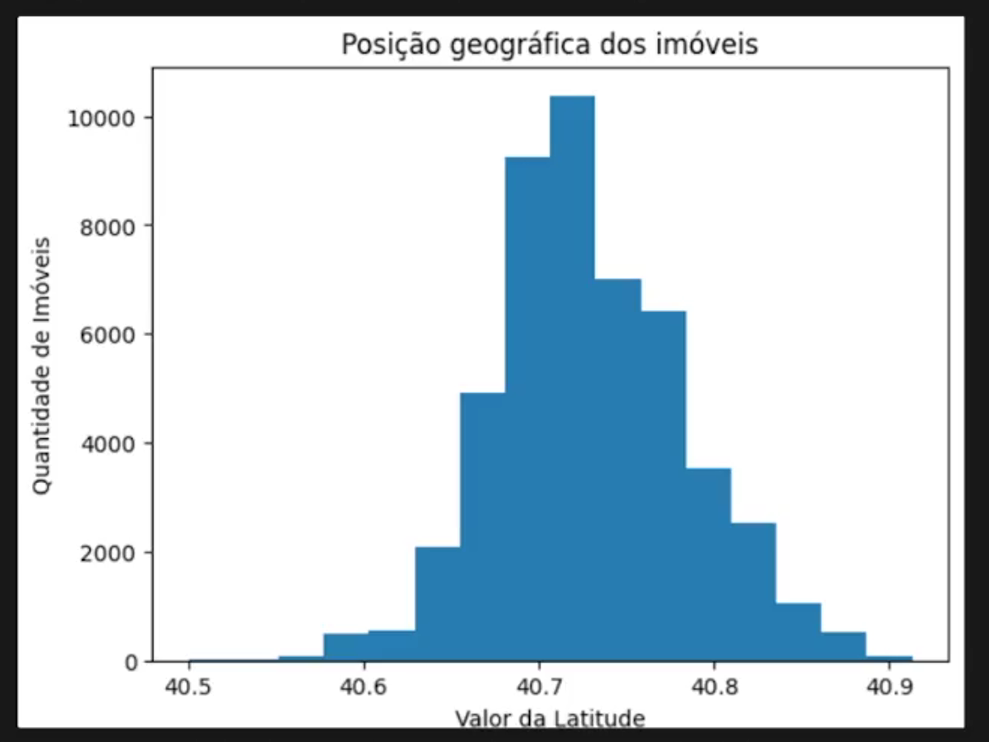

In [22]:
#R: A julgar pelo gráfico, a maior concentração de imóveis se encontra entre as latitudes 40.7 e 40.8

10. **Quantos identificadores únicos existem na base de dados?**

In [37]:
len(df["id"].unique())

38821